In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os
os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [2]:
root = "GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
wangetal_slitless = fits.open("GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")[1].data
# flat_model = fits.open("flat_model_{0}".format(root))[0].data
# unique_spectra = fits.open("unique_spectra_{0}".format(root))[1].data
proper_spectra = fits.open("proper_spectra_{0}".format(root))[1].data
forced_read_in = fits.open("forced_read_in.fits")[1].data

In [3]:
# Background subtraction
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(wangetal_slitless, (511,511), filter_size=(7,7), bkg_estimator=bkg_estimator)
wangetal_slitless -= bkg.background

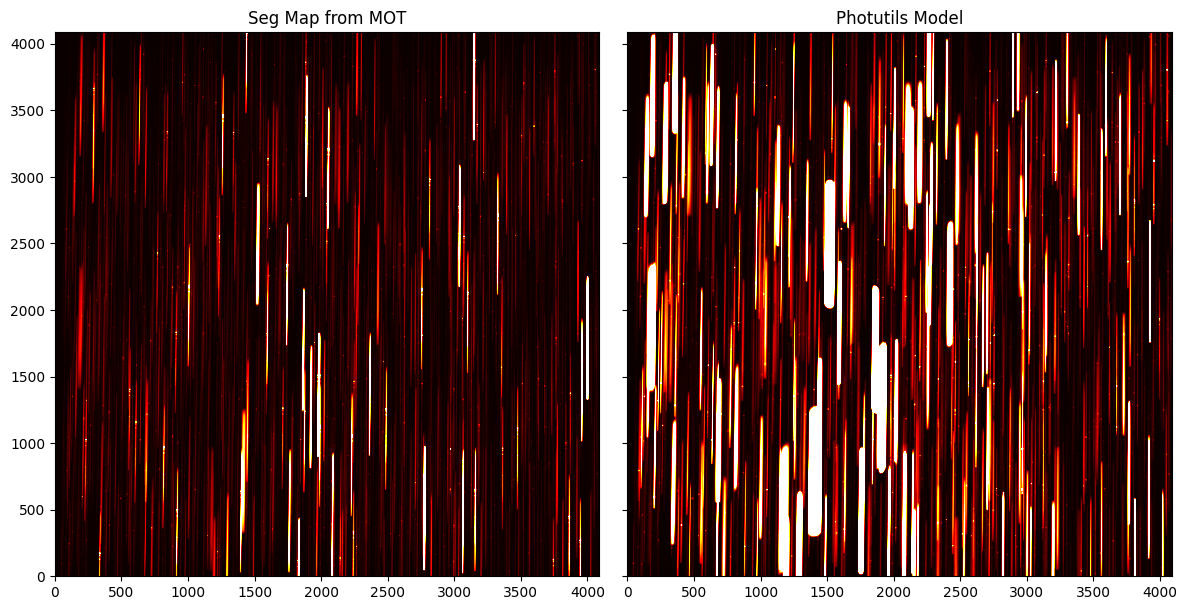

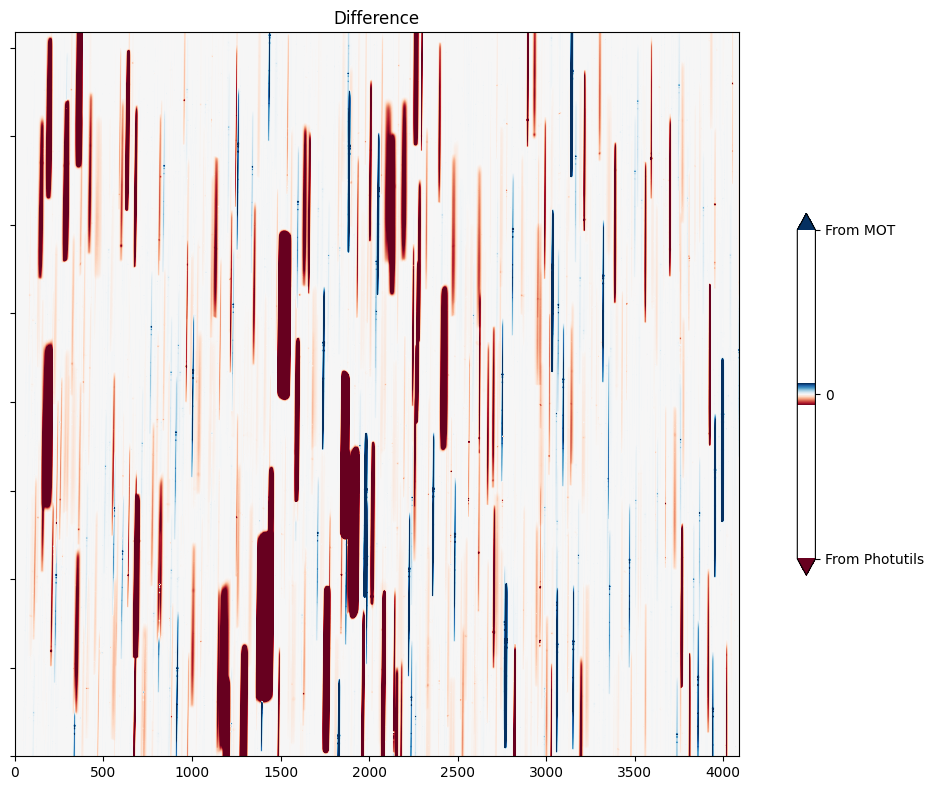

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(forced_read_in, origin='lower', cmap='hot', vmin=0, vmax=forced_read_in.max()/1000)
ax1.set_title("Seg Map from MOT")

ax2.imshow(proper_spectra, origin='lower', cmap='hot', vmin=0, vmax=proper_spectra.max()/1000)
ax2.set_title("Photutils Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(forced_read_in) / np.median(proper_spectra)
difference = forced_read_in - (proper_spectra * scalar)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([10, 0, -10], labels=['From MOT', 0, 'From Photutils'])

fig.tight_layout()
plt.show()

(array([22424., 17592., 14826., 11514.,  8632.,  7122.,  5273.,  4933.,
         4513.,  3785.,  3634.,  2348.,  2248.,  1869.,  1708.,  1861.,
         1666.,  1473.,  1697.,  1368.,  1159.,  1175.,  1060.,  1078.,
          823.,   722.,   547.,   624.,   670.,   678.,   642.,   616.,
          723.,   523.,   502.,   405.,   382.,   322.,   324.,   284.,
          345.,   389.,   290.,   391.,   404.,   326.,   346.,   384.,
          318.,   295.]),
 array([ 1.        ,  1.17999995,  1.36000001,  1.53999996,  1.72000003,
         1.89999998,  2.07999992,  2.25999999,  2.44000006,  2.61999989,
         2.79999995,  2.98000002,  3.16000009,  3.33999991,  3.51999998,
         3.70000005,  3.88000011,  4.05999994,  4.23999977,  4.42000008,
         4.5999999 ,  4.78000021,  4.96000004,  5.13999987,  5.32000017,
         5.5       ,  5.67999983,  5.86000013,  6.03999996,  6.21999979,
         6.4000001 ,  6.57999992,  6.76000023,  6.94000006,  7.11999989,
         7.30000019,  7.4800000

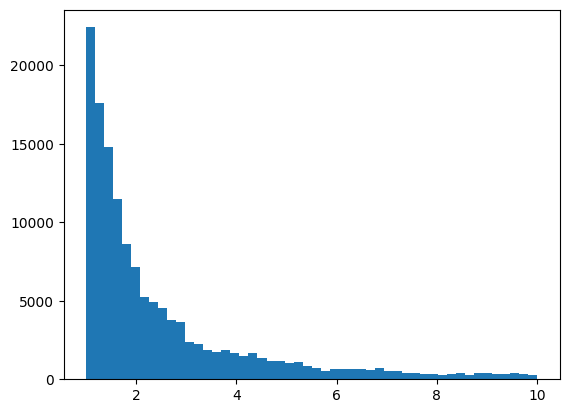

In [5]:
plt.hist(forced_read_in.flatten(), range=(1,10), bins=50)

In [13]:
scalar

0.40985130148750987

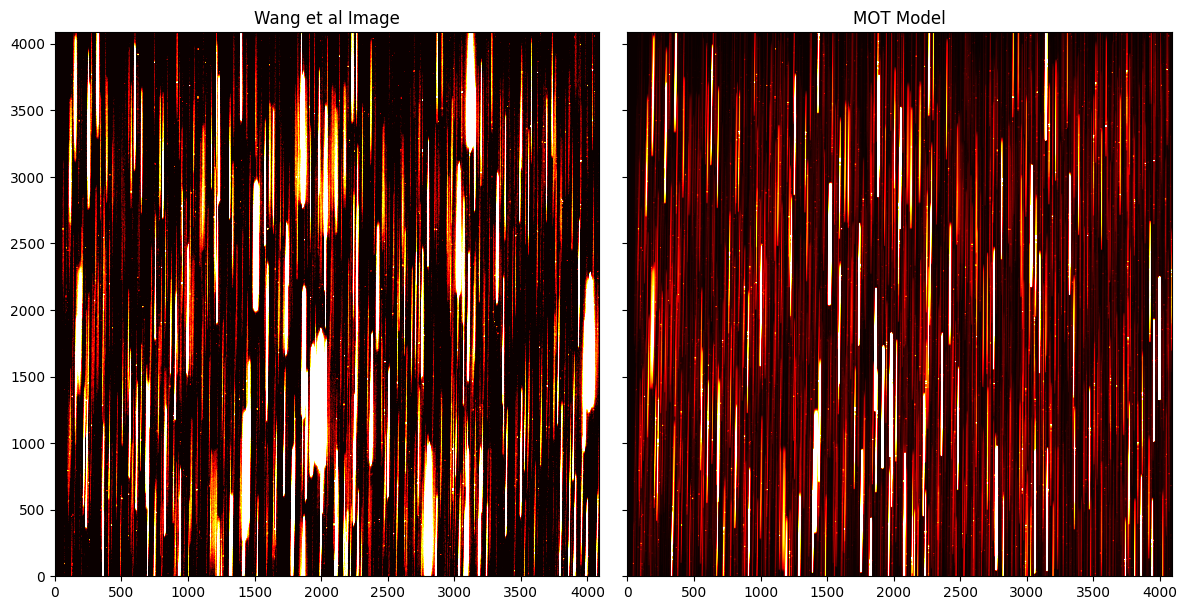

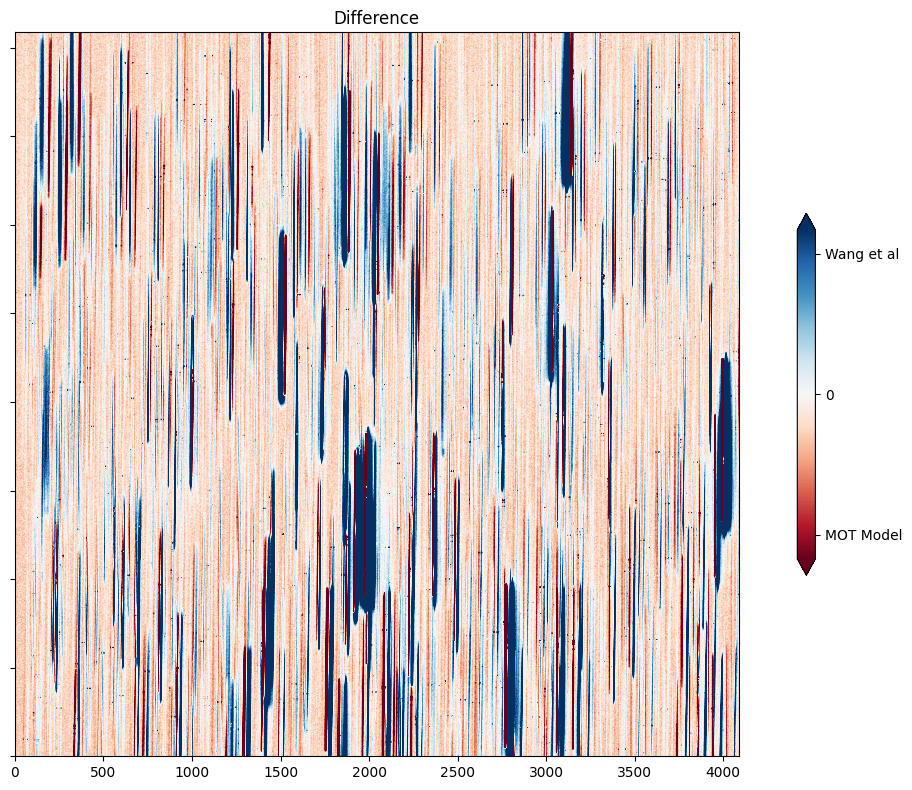

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(forced_read_in, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/500)
ax2.set_title("MOT Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless) / np.median(forced_read_in)
difference = wangetal_slitless - (forced_read_in * 0.5)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'MOT Model'])

fig.tight_layout()
plt.show()

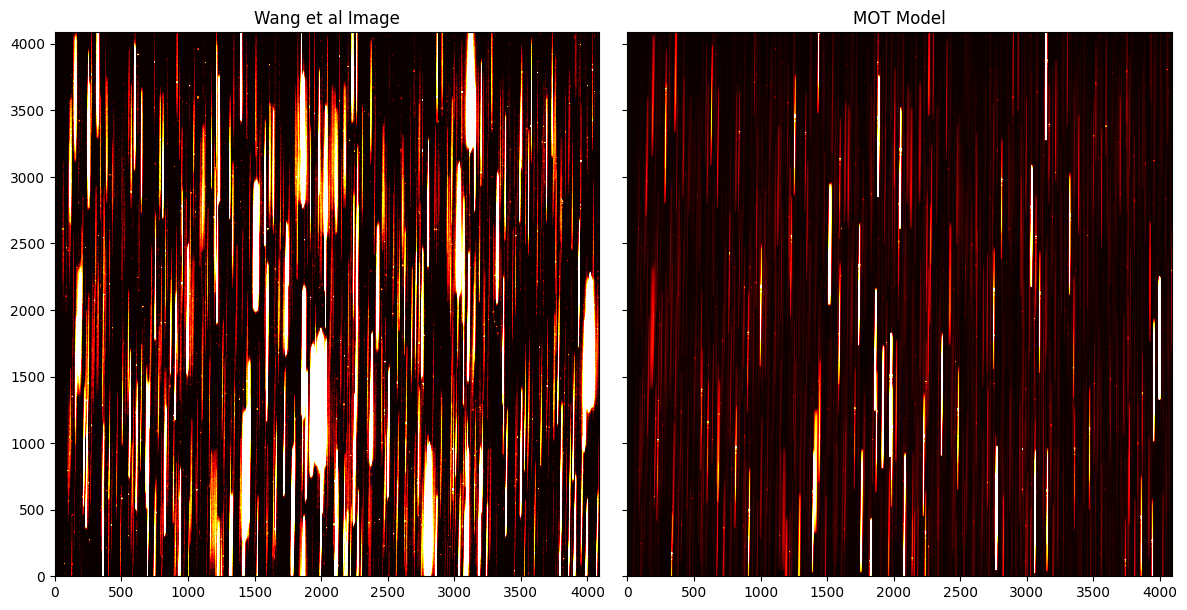

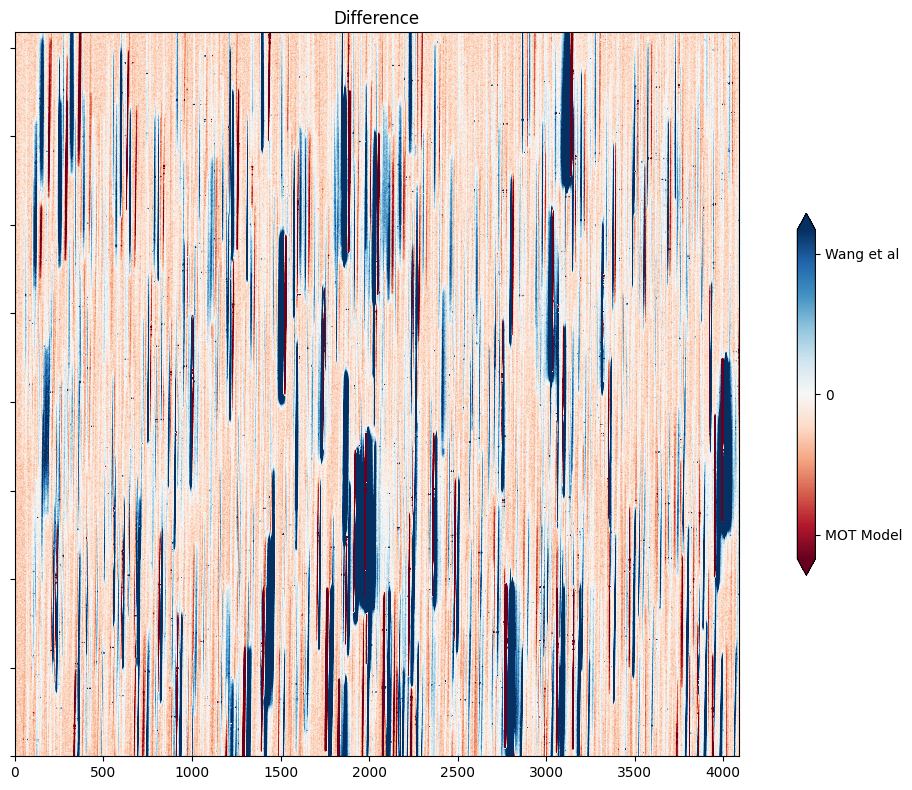

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.imshow(wangetal_slitless, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(forced_read_in, origin='lower', cmap='hot', vmin=0, vmax=forced_read_in.max()/1000)
ax2.set_title("MOT Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()
plt.show()

# Assume a scalar relation and apply correction
scalar = np.median(wangetal_slitless) / np.median(forced_read_in)
difference = wangetal_slitless - (forced_read_in * scalar)

fig, ax = plt.subplots(figsize=(12, 8))

dif = ax.imshow(difference, origin='lower', cmap=plt.cm.RdBu, vmin=-difference.max()/1000, vmax=difference.max()/1000)
ax.set_yticklabels([])
ax.set_title("Difference")
cb = plt.colorbar(dif, shrink = 0.5, extend="both")

cb.set_ticks([0.1, 0, -0.1], labels=['Wang et al', 0, 'MOT Model'])

fig.tight_layout()
plt.show()

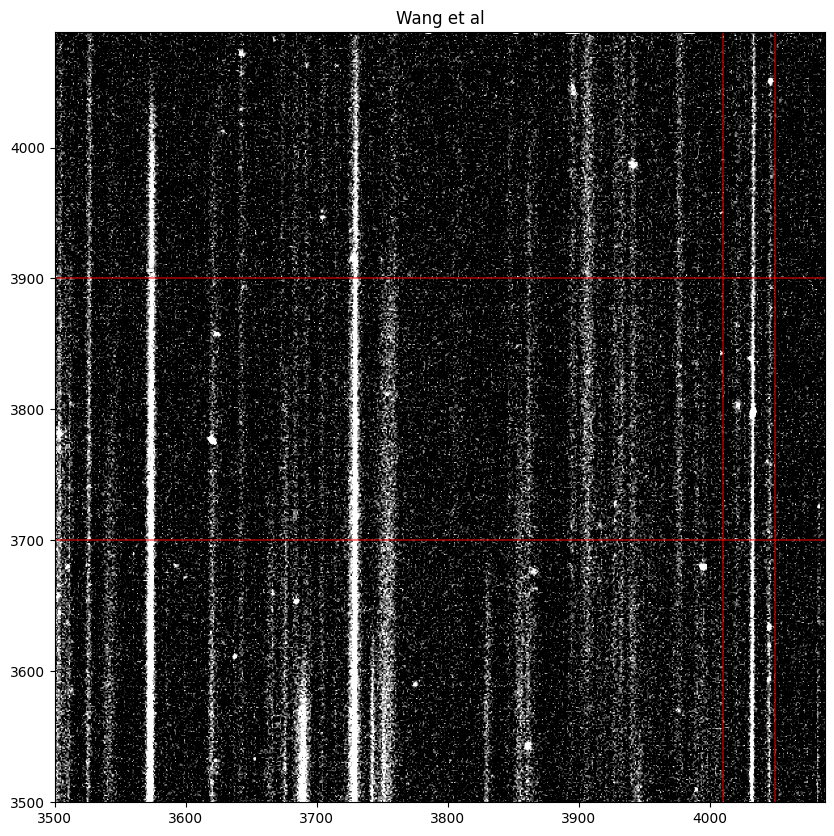

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(wangetal_slitless, origin='lower', cmap='grey', vmin=0, vmax=wangetal_slitless.max()/1000)
ax.set_title("Wang et al")
plt.xlim(3500, 4088)
plt.ylim(3500,4088)

ax.axvline(4010, c='r', alpha=0.5)
ax.axvline(4050, c='r', alpha=0.5)

ax.axhline(3700, c='r', alpha=0.5)
ax.axhline(3900, c='r', alpha=0.5)

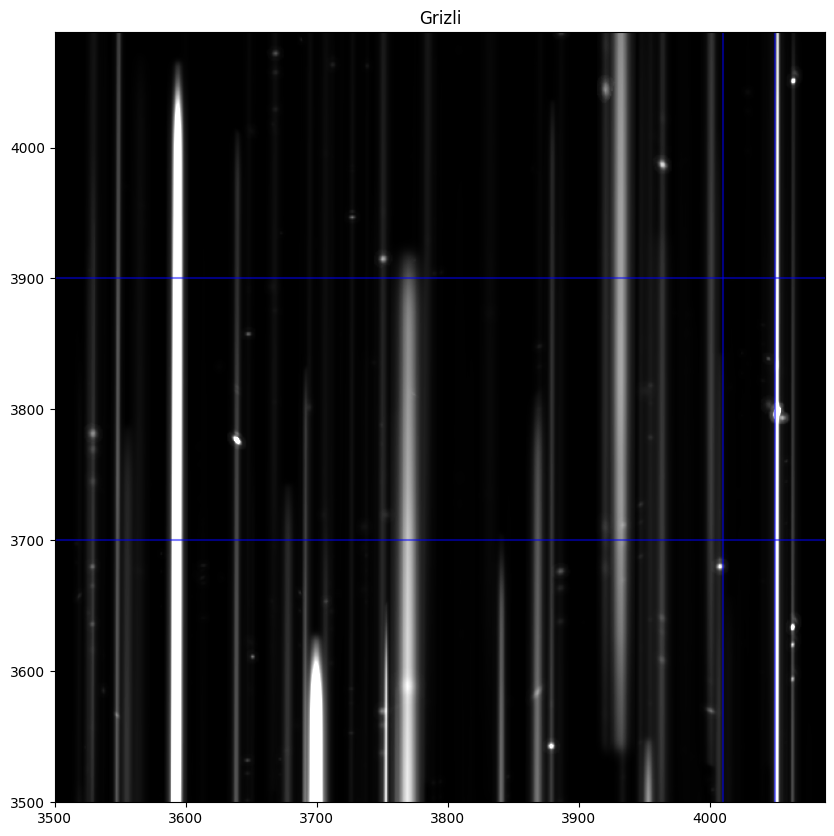

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(proper_spectra, origin='lower', cmap='grey', vmin=0, vmax=proper_spectra.max()/1000)
ax.set_title("Grizli")
plt.xlim(3500, 4088)
plt.ylim(3500,4088)

ax.axvline(4010, c='b', alpha=0.5)
ax.axvline(4050, c='b', alpha=0.5)

ax.axhline(3700, c='b', alpha=0.5)
ax.axhline(3900, c='b', alpha=0.5)